In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pymongo
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
client = pymongo.MongoClient()
db = client['VentDyssynchrony_db']
breath = db.BreathData_collection

In [3]:
print(breath.find_one())

{'_id': 'P100\\WF0\\2014-04-21 13:01:28', 'analysis': {'fl': False, 'pl': False, 'pvt': False, 'pds': nan, 'ie': True, 'ds': False}, 'file_name': 'P100\\Waveform 100-1.txt', 'end_time': datetime.datetime(2014, 4, 21, 13, 1, 29), 'characteristics': {'max_flow': '[]', 'end_insp_vol': 17.5, 'min_flow': "[[-5.7000000000000002, '0 days 00:00:00.224000', 7]]", 'min_exp_flow': nan, 'max_pressure': "[[5.5999999999999996, '0 days 00:00:00.160000', 5]]", 'insp_time': 0, 'max_vol': 37.5, 'breath_time': 0.736, 'min_vol': 17.5, 'peak_insp_flow': 3.0, 'peak_pressure': 5.6, 'min_pressure': "[[4.5, '0 days 00:00:00.384000', 12], [4.2999999999999998, '0 days 00:00:00.480000', 15]]", 'exp_time': 0.736}, 'location': [1398085288000000000, 0], 'patientID': 'P100', 'breath_number': 0, 'start_time': datetime.datetime(2014, 4, 21, 13, 1, 28), 'data_frame': {'DateTime': [datetime.datetime(2014, 4, 21, 13, 1, 28), datetime.datetime(2014, 4, 21, 13, 1, 28), datetime.datetime(2014, 4, 21, 13, 1, 28), datetime.dat

In [4]:
results = breath.find({'analysis.ie':True}, {'_id':0, 'breath_number':1,
                          'data_frame.Flow':1, 'data_frame.Paw':1,
                          'data_frame.Volume':1, 'data_frame.Status':1}).limit(10)

df = pd.DataFrame()
for items in results:
    temp = pd.DataFrame(items['data_frame'])
    temp.reset_index(drop=False, inplace=True)
    temp['breath_num'] = items['breath_number']
    df = df.append(temp)

In [5]:
df.head()

,index,Flow,Paw,Status,Volume,breath_num
0,0,2.10,5.1,0,37.5,0
1,1,1.50,5.1,0,37.5,0
2,2,0.75,5.2,0,37.5,0
3,3,-0.60,5.1,0,37.5,0
4,4,-2.40,5.5,0,37.5,0


In [6]:
df = df.set_index(['index', 'breath_num', 'Status'])
df = df.stack()
df = df.reset_index(drop=False)
df.rename(columns={0:'value', 'level_3':'type'}, inplace=True)

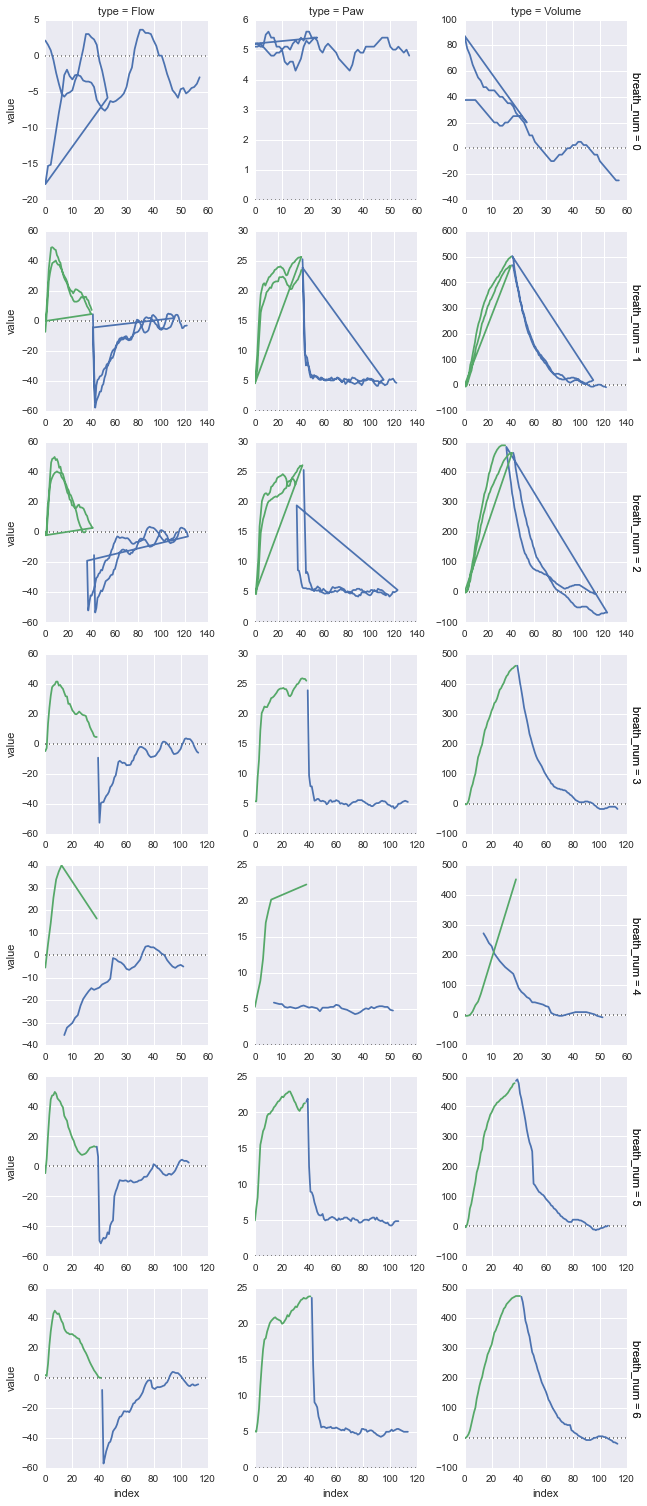

In [7]:
grid = sns.FacetGrid(df, col='type', row='breath_num', hue='Status', size=3, sharex=False, sharey=False, legend_out=True, margin_titles=True)
grid.map(plt.axhline, y=0, ls=":", c=".5")
grid.map(plt.plot, 'index', 'value')

In [8]:
results.rewind()
df = pd.DataFrame()
for items in results:
    temp = pd.DataFrame(items['data_frame'])
    temp.reset_index(drop=False, inplace=True)
    temp['breath_num'] = items['breath_number']
    df = df.append(temp)

In [60]:
df['Vol_dt'] = df.Volume.diff()
df['Flow_dt'] = df.Flow.diff()
df['Paw_dt'] = df.Paw.diff()
df['dF/dV'] = df.Flow_dt/df.Vol_dt
df.head()

,index,Flow,Paw,Status,Volume,breath_num,Vol_dt,Flow_dt,Paw_dt,dF/dV
0,0,2.10,5.1,0,37.5,0,NaN,NaN,NaN,NaN
1,1,1.50,5.1,0,37.5,0,0,-0.60,0.0,-inf
2,2,0.75,5.2,0,37.5,0,0,-0.75,0.1,-inf
3,3,-0.60,5.1,0,37.5,0,0,-1.35,-0.1,-inf
4,4,-2.40,5.5,0,37.5,0,0,-1.80,0.4,-inf


In [75]:
df['dF/dV'].replace('-inf', -10, inplace=True)
df['dF/dV'].replace('+inf', 10, inplace=True)

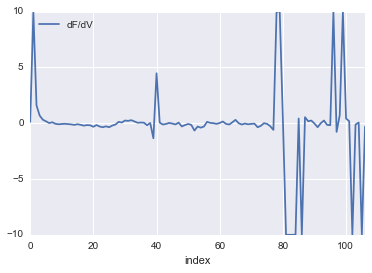

In [76]:
df[df.breath_num == 5].plot('index', 'dF/dV')

In [80]:
df['dF/dV'].describe()

count    934.000000
mean      -0.385661
std        3.766799
min      -10.000000
25%       -0.270000
50%       -0.090000
75%        0.088603
max       10.000000
Name: dF/dV, dtype: float64

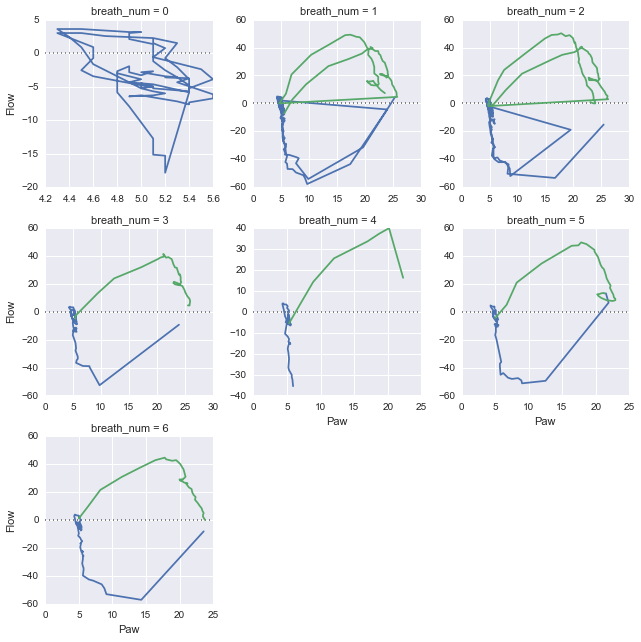

In [10]:
grid = sns.FacetGrid(df, col='breath_num', hue='Status', size=3, sharex=False, sharey=False, col_wrap=3)
grid.map(plt.axhline, y=0, ls=":", c=".5")
grid.map(plt.plot, 'Paw', 'Flow')

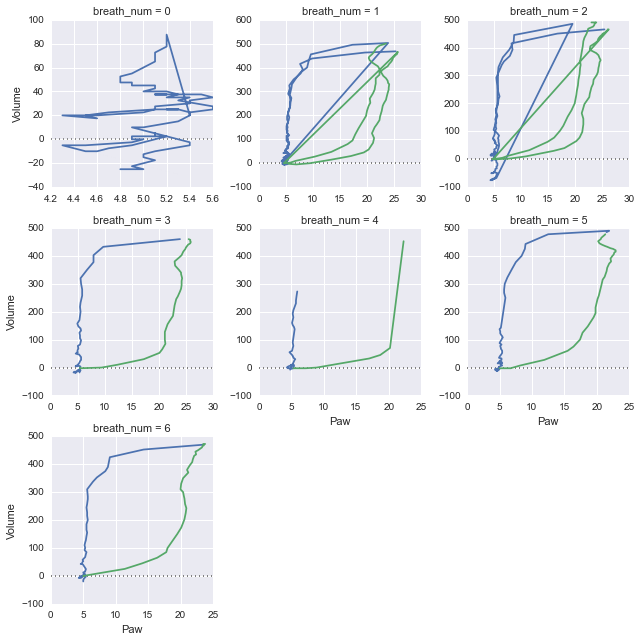

In [11]:
grid = sns.FacetGrid(df, col='breath_num', hue='Status', size=3, sharex=False, sharey=False,  col_wrap=3)
grid.map(plt.axhline, y=0, ls=":", c=".5")
grid.map(plt.plot, 'Paw', 'Volume')

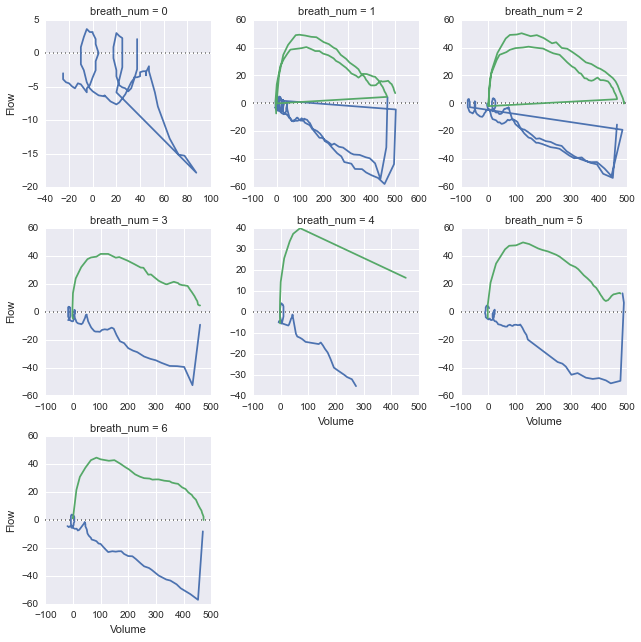

In [12]:
grid = sns.FacetGrid(df, col='breath_num', hue='Status', size=3, sharex=False, sharey=False,  col_wrap=3)
grid.map(plt.axhline, y=0, ls=":", c=".5")
grid.map(plt.plot, 'Volume', 'Flow')

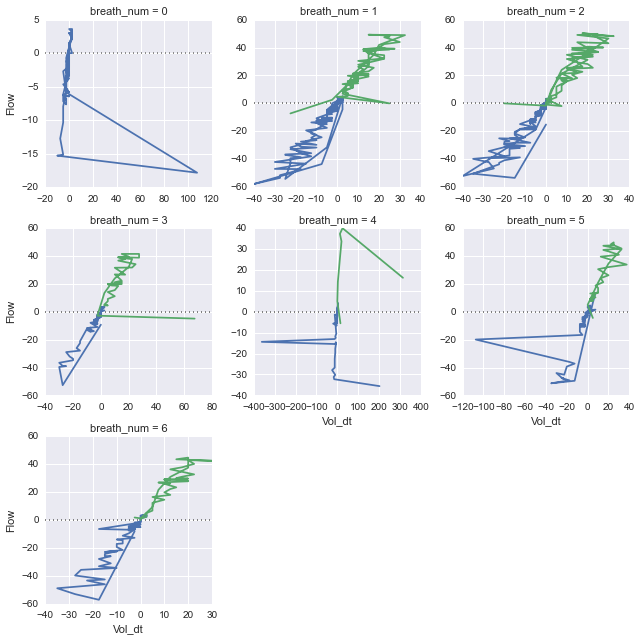

In [13]:
grid = sns.FacetGrid(df, col='breath_num', hue='Status', size=3, sharex=False, sharey=False, col_wrap=3)
grid.map(plt.axhline, y=0, ls=":", c=".5")
grid.map(plt.plot, 'Vol_dt', 'Flow')


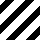
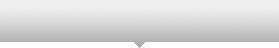
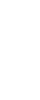
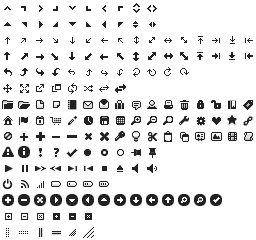
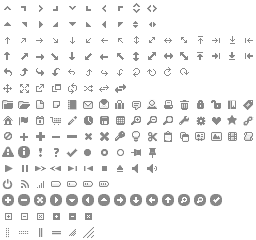
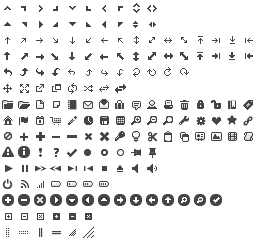
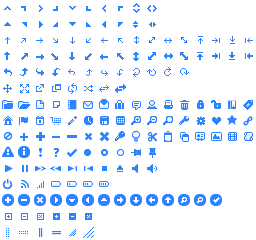
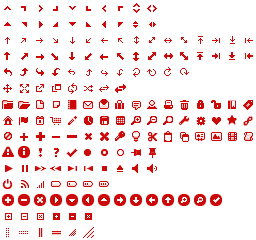
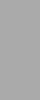
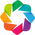
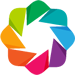
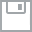
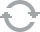
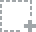
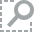
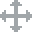
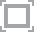
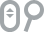

In [77]:
from bokeh.models import ColumnDataSource
from bokeh.io import gridplot, output_notebook, show
from bokeh.plotting import figure

output_notebook()

In [78]:
source = ColumnDataSource(data=df[df.breath_num==5].to_dict(orient='list'))

In [79]:
TOOLS = "box_select,lasso_select,hover,wheel_zoom,pan,reset,help"

uleft = figure(tools=TOOLS, width=300, height=300)
uleft.circle('Volume', 'Flow', source=source)
uleft.xaxis.axis_label = 'Vol'
uleft.yaxis.axis_label = 'Flow'

umid = figure(tools=TOOLS, width=300, height=300)
umid.circle('index', 'dF/dV', source=source)
umid.xaxis.axis_label = 'time'
umid.yaxis.axis_label = 'dF/dV'

uright = figure(tools=TOOLS, width=300, height=300)
uright.circle('index', 'Flow', source=source)
uright.xaxis.axis_label = 'time'
uright.yaxis.axis_label = 'Flow'

mleft = figure(tools=TOOLS, width=300, height=300)
mleft.line('Paw', 'Flow', source=source)
mleft.xaxis.axis_label = 'Paw'
mleft.yaxis.axis_label = 'Flow'

mmid = figure(tools=TOOLS, width=300, height=300)
mmid.line('Paw_dt', 'Flow', source=source)
mmid.xaxis.axis_label = 'Paw_dt'
mmid.yaxis.axis_label = 'Flow'

mright = figure(tools=TOOLS, width=300, height=300)
mright.line('index', 'Paw', source=source)
mright.xaxis.axis_label = 'time'
mright.yaxis.axis_label = 'Paw'

lleft = figure(tools=TOOLS, width=300, height=300)
lleft.line('Volume', 'Paw', source=source)
lleft.xaxis.axis_label = 'Vol'
lleft.yaxis.axis_label = 'Paw'

lmid = figure(tools=TOOLS, width=300, height=300)
lmid.line('Flow_dt', 'Paw', source=source)
lmid.xaxis.axis_label = 'Flow_dt'
lmid.yaxis.axis_label = 'Paw'

lright = figure(tools=TOOLS, width=300, height=300)
lright.line('index', 'Volume', source=source)
lright.xaxis.axis_label = 'time'
lright.yaxis.axis_label = 'Volume'

p = gridplot([[uleft, umid, uright],[mleft, mmid, mright],[lleft, lmid, lright]])

show(p)